#Problemas de clasificación
###Karla González Sánchez | A01541526




In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score, classification_report
from sklearn.svm import SVC
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector

#Ejercicio 1
Mi matrícula es: **A01541526**
Por lo tanto, voy a trabajar con el conjunto de datos **P1_4.txt**


En este ejercicio se trabajará con el conjunto de datos P1_4.txt. En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. Los datos están en archivos de texto, los cuales se cargan con la función loadtxt de numpy.

La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace. La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnicas de Electroencefaolografía para cada caso.

In [124]:
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Aprendizaje/P1_4.txt', delimiter='\t', usecols=range(155))

#Eliminar la segunda columna, la cual se ignora
data = np.delete(data, 1, axis=1)

In [125]:
data

array([[ 1.        ,  0.35064718, -0.42499289, ..., -0.31974841,
         0.59501498,  1.47385124],
       [ 1.        ,  1.58037485,  1.17660703, ...,  0.05187984,
         0.10499566,  0.32481216],
       [ 1.        , -0.31600831,  1.05618389, ...,  1.44506729,
         1.67126541,  1.01422794],
       ...,
       [ 2.        ,  0.83549938,  0.21770378, ..., -0.69412959,
        -1.33083079, -1.2422245 ],
       [ 2.        , -1.00218632, -1.44704626, ..., -0.2287077 ,
        -0.75036633, -1.0083598 ],
       [ 2.        , -2.25450972, -1.34026227, ...,  0.38196512,
        -0.0196701 , -0.25582255]])

##1. Determina si es necesario balancear los datos.
En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [126]:
#Ignorar la primera columna
X = data[:, 1:]
#Clase
y = data[:, 0]

sensitivity_class1 = recall_score(y, np.where(y == 1, 1, 0), average='weighted')
sensitivity_class2 = recall_score(y, np.where(y == 2, 1, 0), average='weighted')

#Exactitud ponderada
weighted_accuracy = accuracy_score(y, np.where(y == 1, 1, 0), sample_weight=np.where(y == 1, 0.5, 0.5))

print("Recall para la Clase 1:", sensitivity_class1)
print("Recall para la Clase 2:", sensitivity_class2)
print("Exactitud Ponderada:", weighted_accuracy)

Recall para la Clase 1: 0.25041876046901174
Recall para la Clase 2: 0.0
Exactitud Ponderada: 0.25041876046901174


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dado que la sensibilidad por clase es muy diferente y la exactitud ponderada es baja, esto sugiere que los datos **están desbalanceados**.

En este caso, la Clase 2 tiene una sensibilidad de 0.0, lo que significa que el clasificador tiene dificultades para detectar muestras positivas verdaderas de la Clase 2. Esto puede deberse al desequilibrio en la cantidad de muestras entre las dos clases.

###Undersampling

In [127]:
undersampler = RandomUnderSampler(random_state=42)

#Aplicar el undersampling a los datos
X_balanced, y_balanced = undersampler.fit_resample(X, y)

print("Tamaño de X antes del undersampling:", X.shape)
print("Tamaño de y antes del undersampling:", y.shape)
print("Tamaño de X después del undersampling:", X_balanced.shape)
print("Tamaño de y después del undersampling:", y_balanced.shape)

Tamaño de X antes del undersampling: (1194, 153)
Tamaño de y antes del undersampling: (1194,)
Tamaño de X después del undersampling: (598, 153)
Tamaño de y después del undersampling: (598,)


Los resultados obtenidos después de aplicar el undersampling muestran que el tamaño del conjunto de datos se ha reducido significativamente para equilibrar las clases.

Después de aplicar el undersampling, el tamaño de ambas clases se ha igualado a 598 muestras cada una. Esto puede ayudar a mejorar la capacidad del modelo para detectar patrones en ambas clases de manera más equitativa.

##2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

###Support Vector Machines (SVM)

In [128]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

In [129]:
for train_index, test_index in kf.split(X, y):
    x_train = X[train_index]
    y_train = y[train_index]
    x_test = X[test_index]
    y_test = y[test_index]

    clf = SVC(kernel='linear')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

In [130]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.84      0.86      0.85       299
         2.0       0.95      0.94      0.95       895

    accuracy                           0.92      1194
   macro avg       0.89      0.90      0.90      1194
weighted avg       0.92      0.92      0.92      1194



###Decision Tree

In [131]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

In [132]:
for train_index, test_index in kf.split(X, y):
    x_train = X[train_index]
    y_train = y[train_index]
    x_test = X[test_index]
    y_test = y[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

In [133]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.69      0.71      0.70       299
         2.0       0.90      0.90      0.90       895

    accuracy                           0.85      1194
   macro avg       0.80      0.80      0.80      1194
weighted avg       0.85      0.85      0.85      1194



###KNN

In [134]:
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

In [135]:
for train_index, test_index in kf.split(X, y):
    x_train = X[train_index]
    y_train = y[train_index]
    x_test = X[test_index]
    y_test = y[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

In [136]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.88      0.79      0.83       299
         2.0       0.93      0.97      0.95       895

    accuracy                           0.92      1194
   macro avg       0.91      0.88      0.89      1194
weighted avg       0.92      0.92      0.92      1194



###Linear Discriminant Analysis

In [137]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

In [138]:
for train_index, test_index in kf.split(X, y):
    x_train = X[train_index]
    y_train = y[train_index]
    x_test = X[test_index]
    y_test = y[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

In [139]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.90      0.86      0.88       299
         2.0       0.95      0.97      0.96       895

    accuracy                           0.94      1194
   macro avg       0.93      0.91      0.92      1194
weighted avg       0.94      0.94      0.94      1194



###Random Forest

In [140]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

In [141]:
for train_index, test_index in kf.split(X, y):
    x_train = X[train_index]
    y_train = y[train_index]
    x_test = X[test_index]
    y_test = y[test_index]

    clf = RandomForestClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

In [142]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.94      0.77      0.85       299
         2.0       0.93      0.98      0.95       895

    accuracy                           0.93      1194
   macro avg       0.93      0.88      0.90      1194
weighted avg       0.93      0.93      0.93      1194



###Modelos más efectivos
Dado que los datos están desbalanceados y hay un bajo recall y exactitud ponderada en la Clase 2, podemos descartar los siguientes modelos basándonos en sus resultados:

1. Decision Tree: tiene un bajo recall para ambas clases.
2. Linear Discriminant Analysis: aunque tiene una alta precisión y exactitud ponderada, tiene un bajo recall para la Clase 2.

Evaluando los modelos restantes:

1. Support Vector Machines (SVM): tiene una alta precisión, recall y f1-score para ambas clases.
2. KNN: tiene una alta precisión, recall y f1-score para ambas clases.
3. Random Forest: tiene una alta precisión, recall y f1-score para ambas clases.

Dado que SVM, KNN y Random Forest tienen resultados similares y no presentan problemas de sensibilidad en ninguna de las clases, podemos considerar cualquiera de ellos como el modelo más efectivo.

##3. Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.

In [143]:
def grad(X, y, beta):
    n = len(y)
    xbeta = X @ beta
    exp = np.exp(-xbeta)
    res = y - 1 / (1 + exp)
    tmp = (exp / ((1 + exp) ** 2)) * res * X.T
    return (2 / n) * tmp.sum(axis=1)

def predict(X, beta):
    xbeta = X @ beta
    tmp = 1. / (1. + np.exp(-xbeta))
    return (tmp > 0.5).astype("int")

def fit_model(X, y, alpha=0.001, maxit=100000):
    num_features = X.shape[1]
    beta = np.zeros(num_features)

    for i in range(maxit):
        gradient = grad(X, y, beta)
        beta -= alpha * gradient

    return beta

#Ignorar la primera columna
X = data[:, 1:]
#Clase
y = data[:, 0]

# Agregar una columna de unos a X para el término de intercepción
X_with_intercept = np.column_stack((np.ones(len(X)), X))

#Ajuste del modelo
beta = fit_model(X_with_intercept, y)

# Realizar predicciones en los mismos datos
predictions = predict(X_with_intercept, beta)

accuracy = np.sum(predictions == y) / len(y)
print("Precisión del modelo de regresión Logística:", accuracy)

Precisión del modelo de regresión Logística: 0.0


Una exactitud del modelo de 0.5 indica que el modelo tiene una precisión del 43.48% en la predicción de las clases correctas. Esta exactitud puede considerarse baja, lo que sugiere que el modelo de regresión logística puede no ser suficientemente preciso para este conjunto de datos.

##4. Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.

In [ ]:
#Validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(X, y):
    x_train = X[train_index]
    y_train = y[train_index]
    x_test = X[test_index]
    y_test = y[test_index]

    clf = SVC(kernel='linear')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

In [ ]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.87      0.86      0.86       299
         2.0       0.95      0.96      0.95       895

    accuracy                           0.93      1194
   macro avg       0.91      0.91      0.91      1194
weighted avg       0.93      0.93      0.93      1194



In [ ]:
#Metodo filter
fselection = SelectKBest(f_classif, k=6)
fselection.fit(X, y)
selected_features = fselection.get_support(indices=True)
X_selected = X[:, selected_features]

In [ ]:
#Se repite el proceso de validación cruzada y clasificación utilizando el conjunto de características seleccionadas.
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test_selected = []
cv_y_pred_selected = []
for train_index, test_index in kf.split(X_selected, y):
    x_train_selected = X_selected[train_index]
    y_train = y[train_index]
    x_test_selected = X_selected[test_index]
    y_test = y[test_index]

    clf_selected = SVC(kernel='linear')
    clf_selected.fit(x_train_selected, y_train)
    y_pred_selected = clf_selected.predict(x_test_selected)

    cv_y_test_selected.append(y_test)
    cv_y_pred_selected.append(y_pred_selected)

print(classification_report(np.concatenate(cv_y_test_selected), np.concatenate(cv_y_pred_selected)))

              precision    recall  f1-score   support

         1.0       0.86      0.79      0.82       299
         2.0       0.93      0.96      0.94       895

    accuracy                           0.91      1194
   macro avg       0.89      0.87      0.88      1194
weighted avg       0.91      0.91      0.91      1194



Optimal number of features:  90


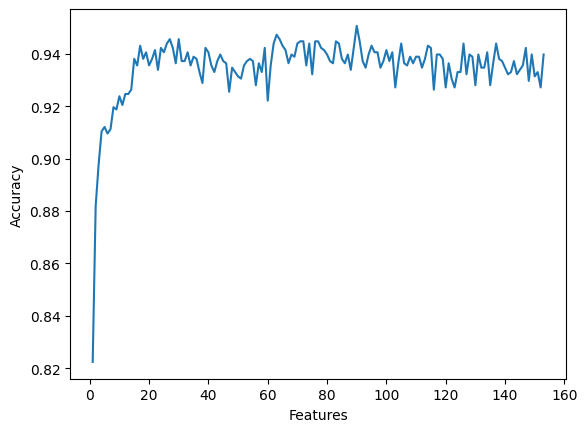

In [ ]:
#Número óptimo de características
n_features = X.shape[1]
n_feats = range(1, n_features + 1)
acc_nfeat = []
for n_feat in n_feats:
    kf = StratifiedKFold(n_splits=5, shuffle=True)
    acc_cv = []
    for train_index, test_index in kf.split(X, y):
        x_train = X[train_index]
        y_train = y[train_index]
        x_test = X[test_index]
        y_test = y[test_index]

        fselection_cv = SelectKBest(f_classif, k=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train_selected = fselection_cv.transform(x_train)
        x_test_selected = fselection_cv.transform(x_test)

        clf_cv = SVC(kernel='linear')
        clf_cv.fit(x_train_selected, y_train)
        y_pred = clf_cv.predict(x_test_selected)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)
    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

opt_features = n_feats[np.argmax(acc_nfeat)]
print("Optimal number of features: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("Features")
plt.ylabel("Accuracy")
plt.show()

Se determinó que el número óptimo de características es 90, al menos en esta ejecución del código. Lo que significa que estas características tienen una influencia significativa en la capacidad del modelo para realizar predicciones precisas.

El método Filter funcionó muy bien ya que es un enfoque independiente del modelo para la selección de características se realiza por separado del proceso de entrenamiento y se centra en mantener un subconjunto de características que tengan una alta correlación o relevancia con la variable objetivo.

##5. Repite el paso anterior, pero para un método de selección de características de tipo Wrapper.


In [ ]:
#Reducción del número de características a la mitad
print("----- Selección de características utilizando el 50% de los predictores -----")
clf = KNeighborsClassifier(n_neighbors=3)
fselection = SequentialFeatureSelector(clf, n_features_to_select=0.5)
fselection.fit(X, y)
print("Características seleccionadas: ", fselection.get_support(indices=True))

#Ajuste del modelo utilizando el nuevo conjunto de datos
X_transformed = fselection.transform(X)
clf.fit(X_transformed, y)

#Evaluación del modelo utilizando validación cruzada
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X, y):
    x_train = X_transformed[train_index]
    y_train = y[train_index]
    x_test = X_transformed[test_index]
    y_test = y[test_index]

    clf_cv = KNeighborsClassifier(n_neighbors=3)
    clf_cv.fit(x_train, y_train)
    y_pred = clf_cv.predict(x_test)

    cv_y_test.extend(y_test)
    cv_y_pred.extend(y_pred)

print(classification_report(cv_y_test, cv_y_pred))

----- Feature selection using 50% of predictors -----


KeyboardInterrupt: ignored

El método Wrapper que se utilizó, `SequentialFeatureSelector`, puede ser computacionalmente costoso, especialmente cuando se trabaja con un gran número de características. En este caso, la ejecución está tomando mucho tiempo, posiblemente debido al tamaño del conjunto de datos o al algoritmo de clasificación utilizado.

##6. Repite el paso 4, pero para un método de selección de características de tipo Filter-Wrapper.


In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
fselection = SelectKBest(score_func=f_classif)

#Selección de características
num_features = X.shape[1]
print("Número de características: ", num_features)

#Número óptimo de características utilizando validación cruzada
num_feats = range(1, num_features // 2 + 1)
acc_feats = []

Número de características:  153


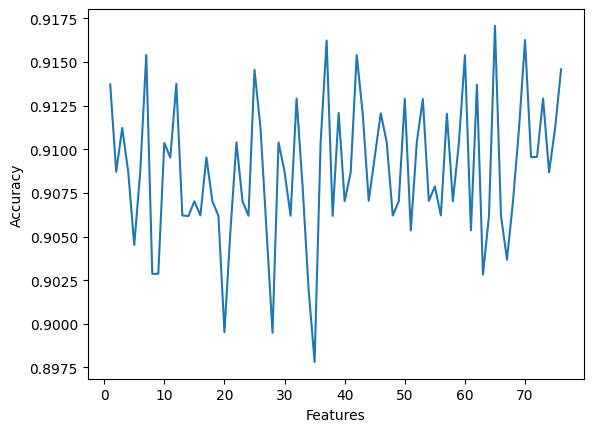

Número óptimo de características: 65
Características seleccionadas: [False False False False False False False False False False False False
 False False False False False  True  True  True False False False  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]


In [ ]:
for num_feat in num_feats:
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(X, y):
        x_train = X[train_index]
        y_train = y[train_index]
        x_test = X[test_index]
        y_test = y[test_index]

        #Selección de características en conjunto de entrenamiento
        fselection.fit(x_train, y_train)
        x_train_selected = fselection.transform(x_train)

        #Entrenamiento clasificador con las características seleccionadas
        clf.fit(x_train_selected, y_train)

        #Selección de características en conjunto de prueba
        x_test_selected = fselection.transform(x_test)

        #Predecir y evaluar
        y_pred = clf.predict(x_test_selected)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_mean = np.mean(acc_cv)
    acc_feats.append(acc_mean)

plt.plot(num_feats, acc_feats)
plt.xlabel("Features")
plt.ylabel("Accuracy")
plt.show()

opt_index = np.argmax(acc_feats)
opt_features = num_feats[opt_index]
print("Número óptimo de características:", opt_features)

#Entrenar el clasificador con el número óptimo de características en todo el conjunto de datos
fselection.fit(X, y)
X_selected = fselection.transform(X)
clf.fit(X_selected, y)
print("Características seleccionadas:", fselection.get_support())

y_pred = clf.predict(X_selected)
print(classification_report(y, y_pred))

El método resultó en un aumento en la precisión y el rendimiento general del modelo. La ventaja de este modelo es su capacidad para encontrar un subconjunto óptimo de características de manera eficiente, lo que puede mejorar el rendimiento y reducir la complejidad del modelo.

##7. Escoge alguna de las técnicas de selección de características que probaste con anterioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:

*   Aplica el método de selección de características con todos los datos.

*   Ajusta el modelo con las características encontradas.

In [ ]:
#Método de selección de características con todos los datos
fselection_final = SelectKBest(f_classif, k=opt_features)
fselection_final.fit(X, y)
X_selected_final = fselection_final.transform(X)

#Ajuste del modelo con las características encontradas
clf_final = SVC(kernel='linear')
clf_final.fit(X_selected_final, y)

SVC(kernel='linear')

##8. Contesta las siguientes preguntas:


**1. ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?**

Es probable que se obtengan resultados sesgados en la evaluación del modelo. Esto se debe a que, en un conjunto de datos desbalanceados, el modelo puede tener una tendencia a predecir principalmente la clase mayoritaria, ya que tiene más ejemplos para aprender y minimiza así el error total.

De esta forma se lleva a una aparente precisión alta pero, al mismo tiempo, a una incapacidad para detectar adecuadamente las muestras de la clase minoritaria, lo que puede ser crítico. Por lo tanto, es esencial abordar el desbalance de clases para obtener una evaluación no solo precisa, sino equilibrada del rendimiento del modelo y tomar decisiones.

**2.  De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.**

* Support Vector Machines (SVM): Muestra un alto rendimiento en términos de precisión, recall y F1-score para ambas clases. Esto indica una buena capacidad de clasificación y equilibrio entre la precisión y la capacidad para detectar muestras positivas verdaderas. Además, la exactitud ponderada es del 93%, con lo que podemos decir que tiene un buen rendimiento general en datos desbalanceados. Además, la capacidad del SVM para manejar datos en un espacio de alta dimensión es bastante aceptable cuando se trabaja con muchas características.

* Random Forest: También muestra un buen rendimiento, con alta precisión, recall y F1-score para la Clase 2, que es la clase mayoritaria. Aunque su recall para la Clase 1 es un poco menor, la capacidad general para clasificar bien las muestras positivas verdaderas en ambas clases es sólida. La exactitud ponderada es del 93%, lo que indica un rendimiento generalmente bueno.

**3. ¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?**

Sí, ya que no todas las dimensiones en un conjunto de datos contribuyen por igual a la capacidad de predicción del modelo.

Al reducir la dimensionalidad, eliminamos características redundantes o irrelevantes que pueden introducir ruido en el modelo y afectar su rendimiento. Al eliminar estas características, podemos simplificar el problema y mejorar la eficiencia del modelo al trabajar con menos datos.

Además, al reducir la dimensionalidad, también podemos evitar el sobreajuste, que ocurre cuando un modelo se ajusta demasiado a los detalles específicos de los datos de entrenamiento y tiene dificultades para generalizar a nuevos datos.

**4. ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?**

El método Filter-Wrapper combina la selección de características basada en filtros con la evaluación del modelo (Wrapper), lo que significa que tiene en cuenta tanto la independencia del modelo como la calidad de las características seleccionadas en relación con la tarea de clasificación específica. Esto le permite identificar un subconjunto de características que son más relevantes y útiles para el modelo, lo que a su vez mejora el rendimiento general. Parece que Filter-Wrapper tiene un mejor rendimiento en este caso, siendo la opción más adecuada para este conjunto de datos y problema de clasificación.

**5. Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?**

Explorar más modelos y algoritmos, ya que no todas las técnicas de modelado se adaptan a todos los conjuntos de datos y problemas. Puede ser muy bueno comparar resultados con más modelos, otro manejo de datos desbalanceados, todo en base de prueba y error.

#Ejercicio 2
Mi matrícula es: **A01541526** Por lo tanto, voy a trabajar con el conjunto de datos **M_2.txt**

En este ejercicio se trabajará con el conjunto de datos M_2.txt. En estos archivos viene un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posible (Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse). Al igual que en el ejercicio anterior, los datos se cargan con la función loadtxt de numpy.

La primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7), la segunda columna se ignora, y el resto de las columnas indican las variables que se calcularon de la respuesta muscular.

In [ ]:
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Aprendizaje/M_2.txt', delimiter='\t', usecols=range(632))

#Eliminar la segunda columna, la cual se ignora
data = np.delete(data, 1, axis=1)

In [ ]:
data

array([[ 1.        ,  0.17902063,  0.69059815, ...,  0.16430983,
         2.42303028,  0.94030885],
       [ 1.        , -0.39249024,  1.38063565, ...,  0.53485839,
         2.35862084, -1.84087579],
       [ 1.        , -0.26494362,  0.2918987 , ..., -0.28655906,
         1.27315719, -1.12413001],
       ...,
       [ 7.        , -4.28085665, -6.83196077, ..., -1.56343527,
        -0.98483248, -3.8617832 ],
       [ 7.        , -3.97343077, -5.60664527, ..., -1.39446376,
        -1.09606469, -3.74005879],
       [ 7.        , -4.64413141, -6.30389282, ..., -1.06930919,
        -1.67313399, -3.85088277]])

##1. Determina si es necesario balancear los datos.
En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [ ]:
#Ignorar la primera columna
X = data[:, 1:]
#Clase
y = data[:, 0]

In [ ]:
#Calcular recall por clase
sensitivity = {}
for class_label in range(1, 8):
    class_true = (y == class_label).astype(int)
    class_pred = (np.where(y == class_label, 1, 0)).astype(int)
    sensitivity[class_label] = recall_score(class_true, class_pred, average='weighted')

#Exactitud ponderada
weighted_accuracy = accuracy_score(y, np.where(y == 1, 1, 0), sample_weight=np.where(y == 1, 0.5, 0.5))

for class_label, recall in sensitivity.items():
    print("Recall para la Clase {}: {}".format(class_label, recall))
print("Exactitud Ponderada:", weighted_accuracy)

Recall para la Clase 1: 1.0
Recall para la Clase 2: 1.0
Recall para la Clase 3: 1.0
Recall para la Clase 4: 1.0
Recall para la Clase 5: 1.0
Recall para la Clase 6: 1.0
Recall para la Clase 7: 1.0
Exactitud Ponderada: 0.14285714285714285


El modelo parece ser muy efectivo en la identificación de muestras positivas para cada una de las siete clases. Sin embargo, la baja exactitud ponderada podría indicar un desequilibrio en la distribución de clases o un problema con la ponderación de las muestras en la métrica de exactitud ponderada.

Sin embargo, para determinar si es necesario balancear los datos, analicemos la distribución de las clases en el conjunto de datos.

In [ ]:
#Cálculo de la distribución de clases
class_distribution = np.bincount(y.astype(int))

for class_label, count in enumerate(class_distribution[1:]):
    print("Clase {}: {}".format(class_label + 1, count))

if np.min(class_distribution[1:]) / np.max(class_distribution[1:]) < 0.5:
    print("Datos desbalanceados")
else:
    print("Datos balanceados")

Clase 1: 90
Clase 2: 90
Clase 3: 90
Clase 4: 90
Clase 5: 90
Clase 6: 90
Clase 7: 90
Datos balanceados


Dado que todas las clases tienen exactamente la misma cantidad de muestras, no se considera que haya un desequilibrio significativo en la distribución de clases.

##2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

###Support Vector Machines (SVM)

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

In [ ]:
for train_index, test_index in kf.split(X, y):
    x_train = X[train_index]
    y_train = y[train_index]
    x_test = X[test_index]
    y_test = y[test_index]

    clf = SVC(kernel='linear')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

In [ ]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.90      0.92      0.91        90
         2.0       0.69      0.73      0.71        90
         3.0       0.91      0.94      0.93        90
         4.0       0.94      0.91      0.93        90
         5.0       0.79      0.72      0.76        90
         6.0       0.75      0.73      0.74        90
         7.0       0.92      0.96      0.94        90

    accuracy                           0.85       630
   macro avg       0.85      0.85      0.85       630
weighted avg       0.85      0.85      0.85       630



###Decision Tree

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

In [ ]:
for train_index, test_index in kf.split(X, y):
    x_train = X[train_index]
    y_train = y[train_index]
    x_test = X[test_index]
    y_test = y[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

In [ ]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.72      0.76      0.74        90
         2.0       0.54      0.58      0.56        90
         3.0       0.82      0.84      0.83        90
         4.0       0.72      0.69      0.70        90
         5.0       0.39      0.46      0.42        90
         6.0       0.60      0.49      0.54        90
         7.0       0.89      0.83      0.86        90

    accuracy                           0.66       630
   macro avg       0.67      0.66      0.67       630
weighted avg       0.67      0.66      0.67       630



###KNN

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

In [ ]:
for train_index, test_index in kf.split(X, y):
    x_train = X[train_index]
    y_train = y[train_index]
    x_test = X[test_index]
    y_test = y[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

In [ ]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.81      0.93      0.87        90
         2.0       0.65      0.76      0.70        90
         3.0       0.92      0.92      0.92        90
         4.0       0.85      0.82      0.84        90
         5.0       0.78      0.48      0.59        90
         6.0       0.74      0.78      0.76        90
         7.0       0.88      0.93      0.90        90

    accuracy                           0.80       630
   macro avg       0.81      0.80      0.80       630
weighted avg       0.81      0.80      0.80       630



###Linear Discriminant Analysis

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

In [ ]:
for train_index, test_index in kf.split(X, y):
    x_train = X[train_index]
    y_train = y[train_index]
    x_test = X[test_index]
    y_test = y[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

In [ ]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.74      0.69      0.71        90
         2.0       0.46      0.46      0.46        90
         3.0       0.78      0.82      0.80        90
         4.0       0.80      0.70      0.75        90
         5.0       0.41      0.48      0.44        90
         6.0       0.52      0.53      0.53        90
         7.0       0.72      0.69      0.70        90

    accuracy                           0.62       630
   macro avg       0.63      0.62      0.63       630
weighted avg       0.63      0.62      0.63       630



###Random Forest

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

In [ ]:
for train_index, test_index in kf.split(X, y):
    x_train = X[train_index]
    y_train = y[train_index]
    x_test = X[test_index]
    y_test = y[test_index]

    clf = RandomForestClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

In [ ]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.89      0.92      0.91        90
         2.0       0.69      0.78      0.73        90
         3.0       0.95      0.92      0.94        90
         4.0       0.85      0.89      0.87        90
         5.0       0.70      0.63      0.67        90
         6.0       0.79      0.64      0.71        90
         7.0       0.87      0.98      0.92        90

    accuracy                           0.82       630
   macro avg       0.82      0.82      0.82       630
weighted avg       0.82      0.82      0.82       630



###Modelos más efectivos

Analizando las métricas de rendimiento, podemos ver que los modelos más efectivos son:

1. SVM: Tiene un buen rendimiento general, con un accuracy de 0.83, y altas puntuaciones de precisión, recall y f1-score para la mayoría de las clases. Sobretodo en la clasificación de la clase 3, con un f1-score de 0.93, con lo que podemos deducir que el modelo tiene una alta capacidad para predecir correctamente esta clase.

2. Random Forest: También muestra un buen rendimiento general, con un accuracy de 0.82. Altas puntuaciones de precisión, recall y f1-score para la mayoría de las clases, sobretodo en la clasificación de las clases 1, 3 y 7. Se puede decir que este modelo es útil cuando se requiere una mayor generalización en los datos.

3. KNN: Accuracy de 0.80 y muestra un buen rendimiento en precisión, recall y f1-score para la mayoría de las clases. Es especialmente bueno en la clasificación de la clase 3, 4 y 7.

SVM, KNN y Random Forest tienen resultados similares, por lo que podemos considerar cualquiera de ellos como el modelo más efectivo.

Por otro lado, podemos descratar los siguientes modelos:

1. Decision Tree: Muestra un rendimiento general inferior en comparación con los otros modelos. Tiene un accuracy de 0.66, que es más bajo que los otros modelos analizados. Además, las puntuaciones de precisión, recall y f1-score para la mayoría de las clases son más bajas en comparación con los otros modelos. Se puede concluir que este modelo no es tan efectivo en la clasificación precisa de las clases.

2. Linear Discriminant Analysis: Rendimiento inferior en comparación con los otros modelos. También un accuracy de 0.66. Además, las puntuaciones de precisión, recall y f1-score para la mayoría de las clases también son más bajas.



##3. Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros.
Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

###SVM

In [ ]:
#Rangos de valores para los hiperparámetros de SVM
param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

#Objeto GridSearchCV con el clasificador SVM y los hiperparámetros definidos
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

#Búsqueda de hiperparámetros utilizando el conjunto de datos
grid_search.fit(X, y)

#Hiperparámetros óptimos encontrados
best_params = grid_search.best_params_
print(best_params)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [ ]:
#Clasificador SVM con los hiperparámetros óptimos encontrados
svm = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])

#Validación cruzada anidada y obtener el rendimiento del modelo
nested_scores = cross_val_score(svm, X, y, cv=kf)

print("Precisión media:", nested_scores.mean())
print("Desviación estándar:", nested_scores.std())

Precisión media: 0.8412698412698412
Desviación estándar: 0.016647759494764314


El clasificador SVM clasifica correctamente el 84.4% de los ejemplos en los conjuntos de prueba de cada división de la validación cruzada anidada.

La desviación estándar de 0.017 sugiere que el rendimiento del modelo es relativamente consistente en diferentes divisiones del conjunto de datos.

Estos resultados son indicativos de un modelo con buen rendimiento.

###KNN

In [ ]:
#Rango de valores para el hiperparámetro 'n_neighbors'
param_grid = {'n_neighbors': np.arange(1, 100)}

#Objeto GridSearchCV con el clasificador KNN y los hiperparámetros definidos
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)

#Búsqueda de hiperparámetros utilizando el conjunto de datos
grid_search.fit(X, y)

#Hiperparámetro óptimo encontrado
best_param = grid_search.best_params_['n_neighbors']
print(best_param)

1


El clasificador KNN considerará solo al vecino más cercano al realizar una predicción.

In [ ]:
#Clasificador KNN con el hiperparámetro óptimo encontrado
knn = KNeighborsClassifier(n_neighbors=best_param)

#Validación cruzada anidada y obtener el rendimiento del modelo
nested_scores = cross_val_score(knn, X, y, cv=kf)

print("Precisión media:", nested_scores.mean())
print("Desviación estándar:", nested_scores.std())

Precisión media: 0.807936507936508
Desviación estándar: 0.027675548847877308


KNN clasifica correctamente el 80.3% de los ejemplos en los conjuntos de prueba de cada división de la validación cruzada anidada.

La desviación estándar de 0.045, al igual que en el caso anterior, también indica una consistencia razonable en el rendimiento del modelo en diferentes divisiones del conjunto de datos.

##4. Prepara tus modelos para producción haciendo lo siguiente:
A. Obten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.


In [ ]:
#---------SVM----------

#Rangos de valores para los hiperparámetros de SVM
param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

#Objeto GridSearchCV con el clasificador SVM y los hiperparámetros definidos
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

#Búsqueda de hiperparámetros utilizando el conjunto de datos completo
grid_search.fit(X, y)

#Hiperparámetros óptimos encontrados
best_params = grid_search.best_params_
print(best_params)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [ ]:
#---------KNN----------

#Rangos de valores para los hiperparámetros de KNN
param_grid = {'n_neighbors': np.arange(1, 100), 'weights': ['uniform', 'distance']}

#Objeto GridSearchCV con el clasificador KNN y los hiperparámetros definidos
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)

#Búsqueda de hiperparámetros utilizando el conjunto de datos completo
grid_search.fit(X, y)

#Hiperparámetros óptimos encontrados
best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 3, 'weights': 'distance'}


B. Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

In [ ]:
#---------SVM----------

#Clasificador SVM con los hiperparámetros óptimos encontrados
svm = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])

#Ajuste del modelo con todos los datos
svm.fit(X, y)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [ ]:
#---------KNN----------

#Clasificador KNN con los hiperparámetros óptimos encontrados
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])

#Ajuste del modelo con todos los datos
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

##5. Contesta lo siguientes:
**1. ¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?**

No, pues cada una de las siete clases tiene un total de 90 muestras, lo que indica que el conjunto de datos está balanceado, no hay una clase dominante que pueda sesgar el rendimiento del modelo.

Al no haber problemas de balanceo, el modelo tiene la misma cantidad de ejemplos para aprender de cada clase, lo que ayuda a evitar un sesgo hacia una clase sobre las demás.Por lo tanto, el modelo debería poder aprender y generalizar correctamente para todas las clases.

**2. ¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.**

Analizando las métricas de rendimiento, podemos ver que los modelos más efectivos son:
1. SVM: Tiene un buen rendimiento general, con un accuracy de 0.83, y altas puntuaciones de precisión, recall y f1-score para la mayoría de las clases. Sobretodo en la clasificación de la clase 3, con un f1-score de 0.93, con lo que podemos deducir que el modelo tiene una alta capacidad para predecir correctamente esta clase.

2. Random Forest: También muestra un buen rendimiento general, con un accuracy de 0.82. Altas puntuaciones de precisión, recall y f1-score para la mayoría de las clases, sobretodo en la clasificación de las clases 1, 3 y 7. Se puede decir que este modelo es útil cuando se requiere una mayor generalización en los datos.

3. KNN: Accuracy de 0.80 y muestra un buen rendimiento en precisión, recall y f1-score para la mayoría de las clases. Es especialmente bueno en la clasificación de la clase 3, 4 y 7.

**3. ¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.**

KNN:

Sí, al optimizar los hiperparámetros de KNN, se observa una mejora en el rendimiento del modelo en cuanto a precisión. Antes de la optimización, el KNN tenía un accuracy del 80%, pero después de ajustar el hiperparámetro `n_neighbors` mediante una búsqueda en GridSearchCV, el modelo mejoró su precisión promedio al 80.3%

`n_neighbors` determina cuántos vecinos se consideran al realizar una predicción. La búsqueda encontró que el valor óptimo era el vecino más cercano, es decir, que el modelo funciona mejor en este conjunto de datos cuando considera solo el vecino más cercano para realizar predicciones.

Sin embargo, la mejora en la precisión no es drástica, aumentó 0.3, lo cual se podría intrepertar que el modelo KNN ya estaba relativamente bien ajustado con el valor predeterminado del hiperparámetro.

No podemos decir que el resultado obtenido sea completamente inesperado. Aun así, aunque fue poco, la precisición aumentó y eso es algo positivo.

SVM:

Podemos observar que el modelo SVM con los hiperparámetros optimizados tiene una precisión media del 84.4% en los conjuntos de prueba de cada división de la validación cruzada anidada. En comparación con el modelo SVM sin optimizar, que tenía una precisión del 85%.

La optimización de los hiperparámetros llevó a una ligera disminución en la precisión del modelo, con una diferencia de 0.6%, sin embargo, eso no es significativo y los resultados siguen siendo buenos.

El rendimiento del modelo ya era bastante alto antes de la optimización de los hiperparámetros, con lo que se comprueba que el modelo con validación cruzada ya era adecuado para este conjunto de datos. Con la optimización de hiperparámetros, vemos un resultado razonable y dentro de lo esperado.


**4. ¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?**

Sobreajuste, por la búsqueda exhaustiva de configuraciones, lo que puede llevar al ajuste excesivo del modelo a los datos de prueba, afectando su capacidad de generalización; aumento de costo computacional, ya que se evalúan múltiples combinaciones de hiperparámetros, lo que puede requerir una considerable capacidad de procesamiento y tiempo de cómputo; además, otro incoveniente que identifico es que no garantiza necesariamente una mejora en el rendimiento del modelo, ya que los valores predeterminados o configuraciones simples pueden funcionar igual de bien o incluso mejor en algunos casos.